In [38]:
import numpy as np
import datetime
import scipy as sp
import scipy.fftpack
import pandas as pd
import seaborn as sns
from numpy.fft import *
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline
import os

In [21]:
def filter_signal(signal, threshold=1e3):
    fourier = rfft(signal)
    frequencies = rfftfreq(signal.size, d=20e-3/signal.size)
    fourier[frequencies > threshold] = 0
    return irfft(fourier)


In [22]:
# see total data
print(os.listdir('../data'))


# hyperparameter
period = 20

['DJI_STO_20period_sma10.csv', 'N225.csv', 'DJI_modified_features - DJI.csv', 'N225fillVOL.csv', 'DJI_modified_sma.csv', 'downjone5y.csv', 'N225withoutNULL.csv', 'dowjone1985_2019.csv', '.ipynb_checkpoints']


In [23]:
df = pd.read_csv('../data/dowjone1985_2019.csv')

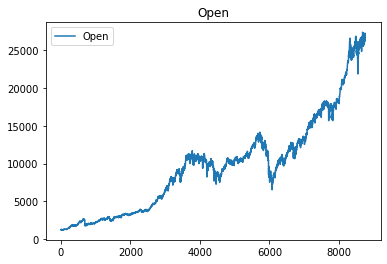

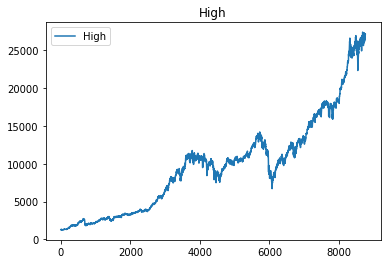

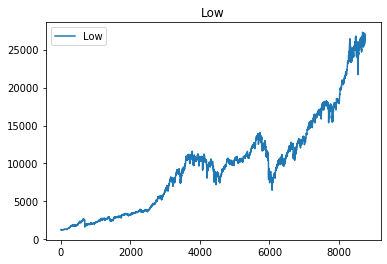

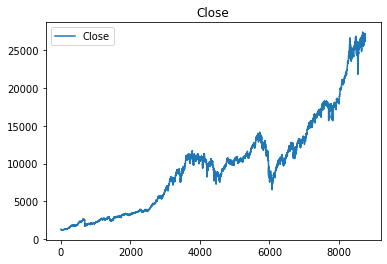

In [24]:
cols = ['Open', 'High', 'Low', 'Close']
for col in cols:
    df.plot(y=[col], title=col)

In [25]:
df_avg = df.dropna().groupby('Date').mean()
df_avg.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1985-01-29,1277.719971,1295.489990,1266.890015,1292.619995,1292.619995,13560000
1985-01-30,1297.369995,1305.099976,1278.930054,1287.880005,1287.880005,16820000
1985-01-31,1283.239990,1293.400024,1272.640015,1286.770020,1286.770020,14070000
1985-02-01,1276.939941,1286.109985,1269.770020,1277.719971,1277.719971,10980000
1985-02-04,1272.079956,1294.939941,1268.989990,1290.079956,1290.079956,11630000


In [32]:
date = df_avg.index.to_datetime()
temp = (df_avg['High'] + df_avg['Low']) / period
N = len(temp)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: to_datetime is deprecated. Use pd.to_datetime(...)
  """Entry point for launching an IPython kernel.


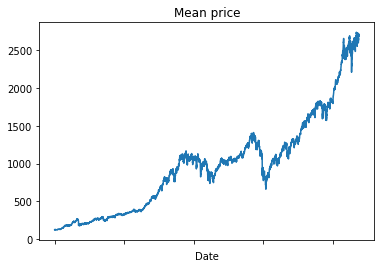

In [37]:
temp.plot(title='Mean price')

In [39]:
temp_fft = sp.fftpack.fft(temp)
temp_psd = np.abs(temp_fft) ** 2
fftfreq = sp.fftpack.fftfreq(len(temp_psd), 1./365)
i = fftfreq > 0

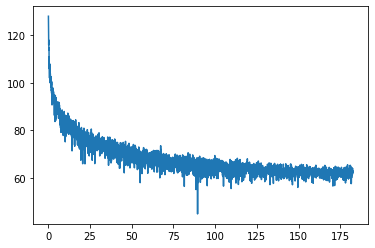

In [42]:
plt.plot(fftfreq[i], 10*np.log10(temp_psd[i]))

In [43]:
temp_fft_bis = temp_fft.copy()
temp_fft_bis[np.abs(fftfreq)> 1.1] = 0

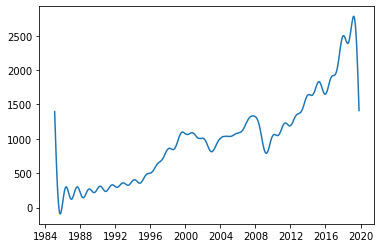

In [46]:
temp_slow = np.real(sp.fftpack.ifft(temp_fft_bis))
# temp.plot()
plt.plot_date(date, temp_slow, '-')

In [50]:
df['denoised'] = temp_slow
temp_slow

array([1396.44606888, 1381.16939432, 1365.88838496, ..., 1442.23055089,
       1426.97859896, 1411.71645465])

In [52]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,denoised
8757,2019-10-25,26789.609375,27015.369141,26765.679688,26958.060547,26958.060547,274610000,1472.696085
8758,2019-10-28,27040.330078,27167.880859,27028.710938,27090.720703,27090.720703,290770000,1457.470362
8759,2019-10-29,27061.070313,27165.939453,27039.759766,27071.460938,27071.460938,269610000,1442.230551
8760,2019-10-30,27110.710938,27204.359375,26999.640625,27186.689453,27186.689453,231750000,1426.978599
8761,2019-10-31,27188.369141,27188.369141,26918.289063,27046.230469,27046.230469,270910000,1411.716455


In [54]:
df.to_csv('../data/DJI_denoise.csv')